# Limitaciones de la computadora

En la clase pasada revisamos los tipos de datos numéricos que soporta `python`. En particular `float`,   `integer` y `complex`. Pero todos ellos, al ser expresados en la computadora, pierden algunas de sus propiedades matemáticas *puras*, por así decirlo.

Matemáticamente los **enteros** (`integers`) son un conjunto *infinito*  $ \mathbb{N} =\{1,2,3,\ldots\}$. La computadora es de tamaño *finito*, por lo cual es imposible representar todos esos números en la computadora. El tipo `int` se representa en 4-bytes, es decir en $32$ bits. (**Ejercicio**: ¿Por qué?). El número máximo (a nivel CPU) está dado por $2^{32}$.

In [ ]:
a=2**1000001+1
a*2

Pero ya que queremos representar tanto los positivos como los negativos:

In [ ]:
[-2**64/2, 2**64/2] 

El valor exacto del límite superior en tu computadora lo puedes obtener mediante:

In [ ]:
import sys
print(sys.maxsize)
print(2**64/2-1)

¿Por qué crees que es diferente? ¿Tiene que ver con la arquitectura de tu **CPU**? ¿Es de $64$ bits? ¿Entonces cuántos bytes se ocupan para representar un entero?

<div class="alert alert-info">
**Ejercicio**: En python, para obtener la representación de un número en binario usamos la función `bin`
</div>

In [1]:
bin(123)

'0b1111011'

Genera una tabla del 0 al 255 con su representación en binario y en decimal. Observa como usamos el `print` para formatear el texto de salida. Usa la ayuda de ipython para entender que hacen los símbolos `%d` y `%s`.  ¿Cuántos caracteres necesitas?

In [2]:
for i in range(5):
    print("%d \t %s" % (i, bin(i)))

0 	 0b0
1 	 0b1
2 	 0b10
3 	 0b11
4 	 0b100


El mismo problema de *finitud* se presenta con los flotantes (que tratan de emular a los reales, $\mathbb{R}$). 

Recordemos primero ( de sus clases de Cálculo), que cualquier número real $x$, puede ser escrito en términos una *mantisa* y un *exponente* de la siguiente manera $$x = a \cdot 10^b$$.

Piensa en esto, cualquier número real, se puede representar con dos números enteros...

Si tu **CPU** es de $32$ bits, se utilizan $8$ bytes para guardar un flotante (ya que $2 \cdot 4$) , si es de $64$ bits se utilizan $16$ bytes.

El estándar **IEEE-754** para el caso de $64$ bits, divide los bits como sigue
- 1 para el signo
- 11 bits para el exponente $b$
- 52 bits para la mantisa $a$

<div class="alert alert-info">
**Ejercicio** ¿Cuál es el número flotante más grande y más pequeño que se puede representar?
</div>

<div class="alert alert-info">
**Ejercicio** ¿Cuántos bytes se requieren para representar un número complejo $\mathbb{C}$? ¿En 32 y en 64 bits?¿Cuáles serán sus limitaciones?
</div>

El siguiente es un error común (observa la demostración en el pizarrón) :

In [ ]:
from paquete import funcion

import pandas as pd 
pd.asdfgsfgs

from pandas import * 
asdfasdfasdf

La salida de los primeros 15 es la siguiente:

In [ ]:
x = 0.0
for i in range(0,15):
    x = x + 0.1
    print("x=%19.17g" % (x))

**Ejercicio**:¿Qué enseñanza puedes sacar de esto?

Existe una manera (entre varias) de resolver el problema:

In [ ]:
Derivative(y(t),t,t,t)x = 0.0
while abs(x -1.0) > 1e-8:
    x = x + 0.1
    print ("x=%19.17g" % (x))

**Ejercicio:** Explica el código.

# Cálculo simbólico

Es posible realizar cálculo simbólico en python (justo como en **Mathematica** o **Maple**) usando el paquete `sympy`. El código siguiente es para imprimir a $\LaTeX$ la salida de las instrucciones.

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

En las celdas que siguen, observa el diferente uso de `import` y `from` ¿Cuál es su función? 

In [2]:
from sympy import Symbol
x = Symbol('x')

In [3]:
x

In [4]:
type(x)

sympy.core.symbol.Symbol

In [5]:
y = Symbol('y')

In [6]:
2*x - x

In [7]:
x +y +x  - 10*y*x

In [8]:
import sympy as sym
x,y,z = sym.symbols('x,y,z')
x + 2*y + 3*z -x

`Sympy` también puede representar tipos numéricos: `Rational` y `Real`

In [9]:
a = sym.Rational(1,10)
a

In [10]:
b = sym.Rational(45,67)

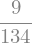

In [11]:
c = a*b
c

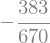

In [12]:
d = a-b
d

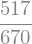

In [13]:
e = a+b
e

In [14]:
float(c)

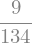

In [15]:
c

Es posible usar el siguiente método para indicarle a python cuántos decimales calcular (aunque no necesariamente se van a usar todos al guardarlo en memoria).

In [16]:
c.evalf()

In [17]:
c.evalf(30)

In [18]:
from sympy import *

In [19]:
?diff

In [20]:
diff(sin(x), x).subs(x,3.1415926535/2)

In [21]:
diff(sin(x), y)

In [22]:
diff(10+3*x+4*x**2+45*x*y, x)

In [23]:
diff(10+3*x+4*x**2+45*x*y, x).subs(x, 1)

In [24]:
diff(10+3*x+4*x**2+45*x*y, x,y)

In [25]:
diff(10+3*x+4*x**2+45*x*y, x,x)

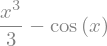

In [26]:
integrate(x**2 + sin(x), x)

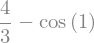

In [27]:
integrate(x**2 + sin(x), (x, 0, 1))

<div class="alert alert-info">
**Ejercicio:** Resuelva simbólicamente lo siguiente: Se lanza una pelota al aire con una velocidad $v_0$ a un ángulo $\theta$. La gravedad es $g$. 
- ¿Cuál es la altura máxima? 
- ¿Cuál es la distancia máxima?
- ¿Cuál es el tiempo de vuelo?
- De una respuesta numérica, cuando $v_0 = 10 \frac{m}{s}$ y $\theta=\pi/2$.
</div>

In [ ]:
y

`Sympy` también permite resolver ecuaciones diferenciales ordinarias (**ODE**, en inglés), usando la función `dsolve`. 

In [ ]:
dsolve?

In [ ]:
Function?

In [ ]:
Derivative?

In [28]:
y = Function('y')
x = Symbol('x')
y_ = Derivative(y(x), x)

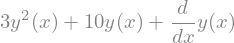

In [29]:
ode = y_ + 10*y(x) + 3*y(x)**2
ode

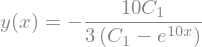

In [30]:
sol = dsolve(ode, y(x))
sol

In [31]:
type(sol)

sympy.core.relational.Equality

<div class="alert alert-danger">
Que el tipo sea `Equality` será muy importante cuando querrámos graficar. Manten este hecho en mente.
</div>

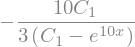

In [32]:
sol.rhs

<div class="alert alert-info">
**Ejercicio** 
- Demuestra que $y_1 = e^t$ y $y_2 = t e^t$ son soluciones de la **ODE** $y^{''} -2y^{'} + y = 0$. No uses `dsolve`. Recuerda que tienes que definir los *símbolos* $y$ y $t$.
- Ahora resuelve usando `dsolve`. Recuerda definir la función.
</div>

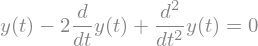

In [33]:
y = Function('y')
t = Symbol('t')
Derivative(y(t),t)
Eq(Derivative(Derivative(y(t),t),t)-2*Derivative(y(t),t)+y(t),0)

In [34]:
dsolve(Derivative(Derivative(y(t),t),t)-2*Derivative(y(t),t)+y(t))

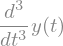

In [35]:
Derivative(y(t),t,t,t)

Regularmente al resolver problemas científicos es necesario utilizar aproximaciones en forma de series. `Sympy` también puede hacerlas.

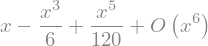

In [36]:
sin(x).series(x,0)

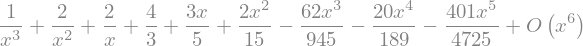

In [37]:
(exp(x)**2*cos(x)/sin(x)**3).series(x,0)

Por último ¿Recuerdas el problema con los flotantes? Pues con `Sympy` se puede resolver.

In [38]:
dx = Rational(1,10)

In [39]:
x = 0

In [40]:
while x != 1.0:
    x = x+dx
    print("x=%4s = %3.1f" % (x, x.evalf()))

x=1/10 = 0.1
x= 1/5 = 0.2
x=3/10 = 0.3
x= 2/5 = 0.4
x= 1/2 = 0.5
x= 3/5 = 0.6
x=7/10 = 0.7
x= 4/5 = 0.8
x=9/10 = 0.9
x=   1 = 1.0


Pero hacer estos cálculos de manera simbólica es mucho más lento que hacerlo de forma numerica:

In [ ]:
dx_symbolic = Rational(1,10)

def bucle_sympy(n):
    x = 0
    for i in range(n):
        x = x + dx_symbolic
    return x

In [ ]:
dx = 0.1
def bucle_float(n):
    x = 0
    for i in range(n):
        x = x + dx
    return x

In [ ]:
n = 100000

In [ ]:
%timeit bucle_sympy(n)

In [ ]:
%timeit bucle_float(n)